Classification Report:

                   precision    recall  f1-score   support

Not Cyberbullying       0.82      0.94      0.88      2300
    Cyberbullying       0.82      0.55      0.66      1070

         accuracy                           0.82      3370
        macro avg       0.82      0.75      0.77      3370
     weighted avg       0.82      0.82      0.81      3370



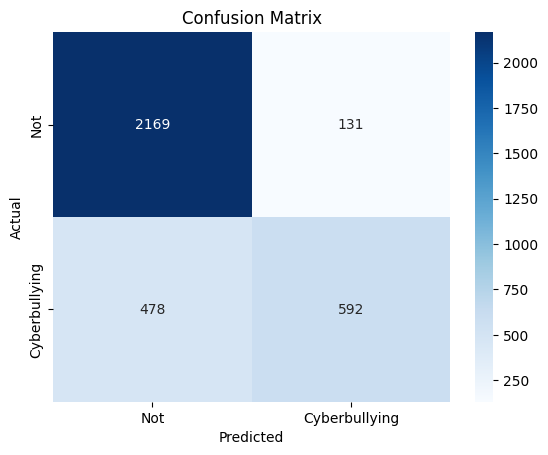

Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best Params: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
Improved Classification Report:

                   precision    recall  f1-score   support

Not Cyberbullying       0.84      0.90      0.87      2300
    Cyberbullying       0.74      0.63      0.68      1070

         accuracy                           0.81      3370
        macro avg       0.79      0.76      0.77      3370
     weighted avg       0.81      0.81      0.81      3370



In [7]:
# 1. Import Required Libraries
import pandas as pd
import re
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Load the dataset
df = pd.read_csv("dataset.csv")  # Make sure the file is uploaded and named correctly

# 3. Drop rows with missing values
df = df.dropna(subset=['Text', 'oh_label'])  # Ensure these columns exist

# 4. Clean text function
def clean_text(text):
    text = re.sub(r"http\S+|@\S+|#[A-Za-z0-9_]+", "", text)
    text = text.lower()
    text = re.sub(r"[^\w\s]", "", text)
    text = re.sub(r"\d+", "", text)
    text = " ".join(word for word in text.split() if word not in ENGLISH_STOP_WORDS)
    return text

# 5. Apply cleaning
df["clean_text"] = df["Text"].apply(clean_text)

# 6. Split the dataset
X = df["clean_text"]
y = df["oh_label"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 7. TF-IDF Vectorization (with unigrams + bigrams)
vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=3000, min_df=5)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# 8. Train Logistic Regression Model
lr = LogisticRegression()
lr.fit(X_train_vec, y_train)
y_pred = lr.predict(X_test_vec)

# 9. Evaluation
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=["Not Cyberbullying", "Cyberbullying"]))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Not", "Cyberbullying"],
            yticklabels=["Not", "Cyberbullying"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# 10. Hyperparameter Tuning (optional)
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['liblinear']
}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=3, scoring='f1', verbose=1)
grid.fit(X_train_vec, y_train)

print(f"Best Params: {grid.best_params_}")
y_pred_best = grid.best_estimator_.predict(X_test_vec)

print("Improved Classification Report:\n")
print(classification_report(y_test, y_pred_best, target_names=["Not Cyberbullying", "Cyberbullying"]))
